In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Charger le DataFrame à partir du fichier CSV
data = pd.read_csv('data_ED.csv')
data

,Gender,Age,Triage Score,Access Mode,Time of Admission,LOS
0,F,over 64,Green,Autonomous,18:00–24:00,< 3h
1,F,under 19,Green,Autonomous,12:00–18:00,< 3h
2,F,10–40,Green,Autonomous,06:00–12:00,> 3h
3,F,under 19,Green,Autonomous,12:00–18:00,< 3h
4,M,10–40,Green,Via ambulance,12:00–18:00,< 3h
...,...,...,...,...,...,...
496167,M,10–40,Green,Autonomous,18:00–24:00,< 3h
496168,F,41–64,Green,Via ambulance,12:00–18:00,< 3h
496169,M,41–64,Green,Autonomous,18:00–24:00,> 3h
496170,F,over 64,Green,Via ambulance,06:00–12:00,< 3h


In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
lc=LabelEncoder()
cols=['Gender', 'Age', 'Triage Score', 'Access Mode', 'Time of Admission','LOS']
for i in cols:
  data[i]=lc.fit_transform(data[i])

In [32]:
data

,Gender,Age,Triage Score,Access Mode,Time of Admission,LOS
0,0,2,1,0,3,0
1,0,3,1,0,2,0
2,0,0,1,0,0,1
3,0,3,1,0,2,0
4,1,0,1,1,2,0
...,...,...,...,...,...,...
496167,1,0,1,0,3,0
496168,0,1,1,1,2,0
496169,1,1,1,0,3,1
496170,0,2,1,1,0,0


In [45]:
# Division des données en ensembles d'entraînement et de test

y = data["LOS"]
x = data.drop("LOS", axis = 1)
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.25, random_state=42)

In [46]:
#Creation du model pour l'algorithme Random Forest
modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='sqrt',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)

In [47]:
#Apprentissage of model
modele_rf.fit(x_train, y_train)

RandomForestClassifier()

In [48]:
pd.DataFrame(modele_rf.feature_importances_,
              index = x_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
Triage Score,0.369524
Time of Admission,0.252714
Age,0.203937
Access Mode,0.100658
Gender,0.073167


In [49]:
from sklearn.metrics import accuracy_score
print(f"Le pourcentage de LOS est de : {accuracy_score(y_test, modele_rf.predict(x_test))*100} %")


Le pourcentage de LOS est de : 71.10679361189266 %


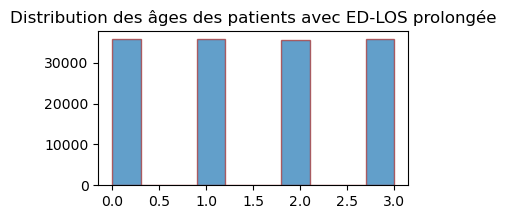

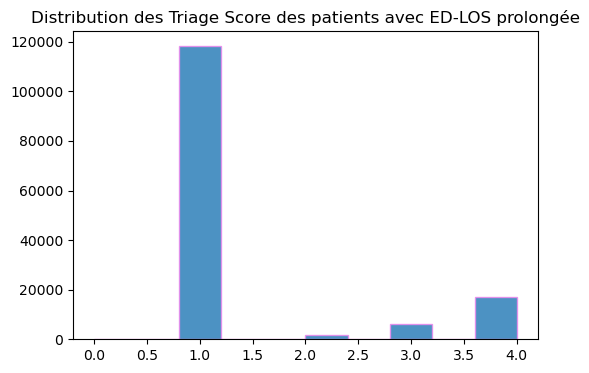

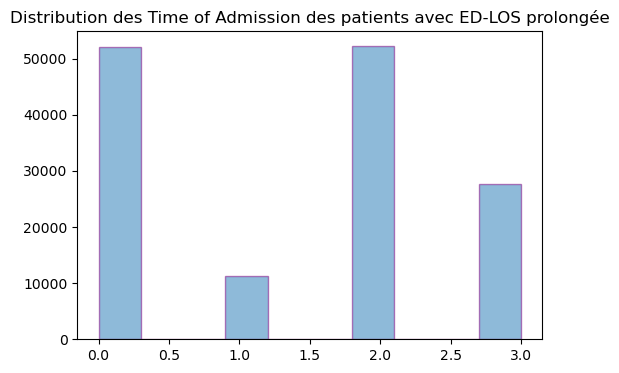

In [51]:
import matplotlib.pyplot as plt

#df = pd.read_csv('data_ED.csv')
df_his = data[data['LOS'] == 1]
df_his
# Création de l'histogramme
plt.figure(figsize=(4, 2))
plt.hist(df_his['Age'], bins=10, edgecolor='brown', alpha=0.7)
plt.title('Distribution des âges des patients avec ED-LOS prolongée')
plt.show()

# Création de l'histogramme
plt.figure(figsize=(6, 4))
plt.hist(df_his['Triage Score'], bins=10, edgecolor='violet', alpha=0.8)
plt.title('Distribution des Triage Score des patients avec ED-LOS prolongée')
plt.show()

# Création de l'histogramme
plt.figure(figsize=(6, 4))
plt.hist(df_his['Time of Admission'], bins=10, edgecolor='purple', alpha=0.5)
plt.title('Distribution des Time of Admission des patients avec ED-LOS prolongée')
plt.show()

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Calcul de l'accuracy spécifique au modèle Random Forest
accuracy_rf = accuracy_score(y_test, modele_rf.predict(x_test))

# Faire des prédictions sur l'ensemble de test
y_pred_rf = modele_rf.predict(x_test)
                           
# Créer la matrice de confusion
conf_matrix_rf =pd.DataFrame(confusion_matrix(y_test, y_pred_rf),index = ["LOS >3h_données", "LOS <3h_données"],
             columns = ["LOS >3h_predit", "LOS <3h_predit"])
#conf_matrix_rf

# Calcul de la précision spécifique au modèle Random Forest
precision_rf = precision_score(y_test, y_pred_rf)

# Calcul du rappel spécifique au modèle Random Forest
recall_rf = recall_score(y_test, y_pred_rf)

# Calcul du F1-score spécifique au modèle Random Forest
f1_rf = f1_score(y_test, y_pred_rf)

# Regroupement des métriques
metrics_rf = pd.DataFrame({'accuracy': [accuracy_rf],'Precision': [precision_rf],
                           'Recall': [recall_rf],
                           'F1-Score': [f1_rf]}, index=['Random Forest'])

metrics_rf

,accuracy,Precision,Recall,F1-Score
Random Forest,0.711068,0.473684,0.000251,0.000502
